In [23]:
# Libraries
import numpy as np
import pandas as pd
import plotly as plt
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_random_state
from sklearn.metrics import mean_absolute_error, mean_squared_error
import graphviz
from collections import OrderedDict
from sympy import simplify
from math import sqrt

# For Support Vector Regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# For GPLearn
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

In [3]:
all_stats = pd.read_csv("./Datasets/All_Datasets_Stats.csv")
GPLearnAl = pd.read_csv("./GPLearn/Configurations/Al.csv")
GPLearnBB = pd.read_csv("./GPLearn/Configurations/BB.csv")
GPLearnSt = pd.read_csv("./GPLearn/Configurations/St.csv")
GPLearnBM = pd.read_csv("./GPLearn/Configurations/time.csv")

RRAl = pd.read_csv("./RandomForest/Configurations/Al.csv")
RRBB = pd.read_csv("./RandomForest/Configurations/BB.csv")
RRSt = pd.read_csv("./RandomForest/Configurations/St.csv")
RRBM = pd.read_csv("./RandomForest/Configurations/time.csv")

SVAl = pd.read_csv("./SupportVectorRegression/Configurations/Al.csv")
SVBB = pd.read_csv("./SupportVectorRegression/Configurations/BB.csv")
SVSt = pd.read_csv("./SupportVectorRegression/Configurations/St.csv")
SVBM = pd.read_csv("./SupportVectorRegression/Configurations/time.csv")

# addCol(GPLearnBB)
# GPLearn["Algorithms"] = "GPLearn"
# GPLearn["irace"] = "irace"
# GPLearnRMSE = GPLearn["rmse"]
# Random_Forest = pd.read_csv("./RandomForest/time.csv")
# Random_Forest["Algorithms"] = "Random Forest Regressor"
# Random_Forest["irace"] = "irace"
# Random_ForestRMSE = Random_Forest["rmse"]
# Support_Vector_Regression = pd.read_csv("./SupportVectorRegression/time.csv")
# Support_Vector_Regression["Algorithms"] = "Support Vector Regression"
# Support_Vector_Regression["irace"] = "irace"
# Support_Vector_RegressionRMSE = Support_Vector_Regression["rmse"]
# Support_Vector_Regression

In [286]:
GPLearnAl["Dataset"] = "Al-Feymann"
GPLearnBB["Dataset"] = "Black-box"
GPLearnSt["Dataset"] = "Strogatz"
GPLearnBM["Dataset"] = "Synthetic"

RRAl["Dataset"] = "Al-Feymann"
RRBB["Dataset"] = "Black-box"
RRSt["Dataset"] = "Strogatz"
RRBM["Dataset"] = "Synthetic"

SVAl["Dataset"] = "Al-Feymann"
SVBB["Dataset"] = "Black-box"
SVSt["Dataset"] = "Strogatz"
SVBM["Dataset"] = "Synthetic"

all_GP = GPLearnAl.append(GPLearnBB.append(GPLearnSt.append(GPLearnBM)))
all_RR = RRAl.append(RRBB.append(RRSt.append(RRBM)))
all_SVR = SVAl.append(SVBB.append(SVSt.append(SVBM)))

all_GP["Algorithms"] = "GPLearn"
all_RR["Algorithms"] = "Random Forest Regressor"
all_SVR["Algorithms"] = "Support Vector Regressor"

alldata = all_GP.append(all_RR.append(all_SVR))

In [287]:
# # Clean dataset
# def clean (DATA):
#     for i in range(len(DATA) ):
#         if DATA.File[i].find("../Datasets/") != -1:
#             print(DATA.File[i]) 
#             DATA.File[i] = DATA.File[i].replace("../Datasets/","")
#     DATA.to_csv("./GPLearn/Configurations/BB.csv", index=False)
# clean(GPLearnBB)

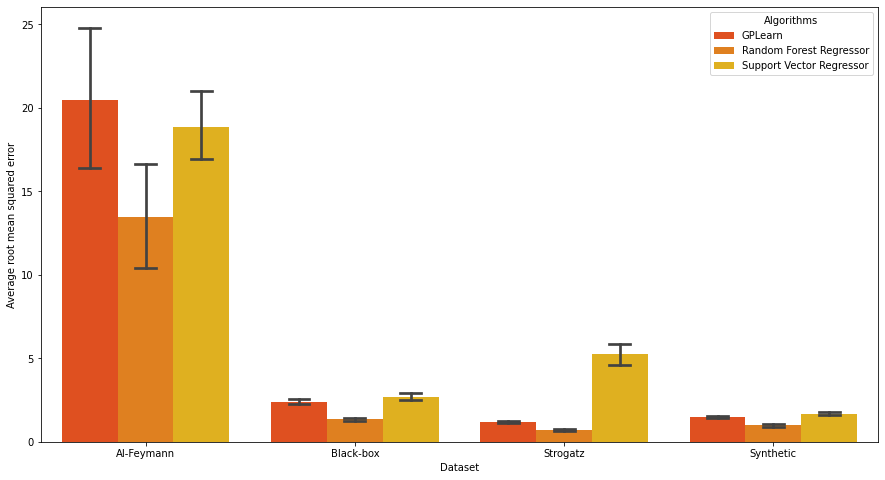

In [288]:
alldata = alldata.rename(columns={"rmse":"Average root mean squared error"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average root mean squared error", hue= "Algorithms", palette="autumn" , capsize=.1, data = alldata)


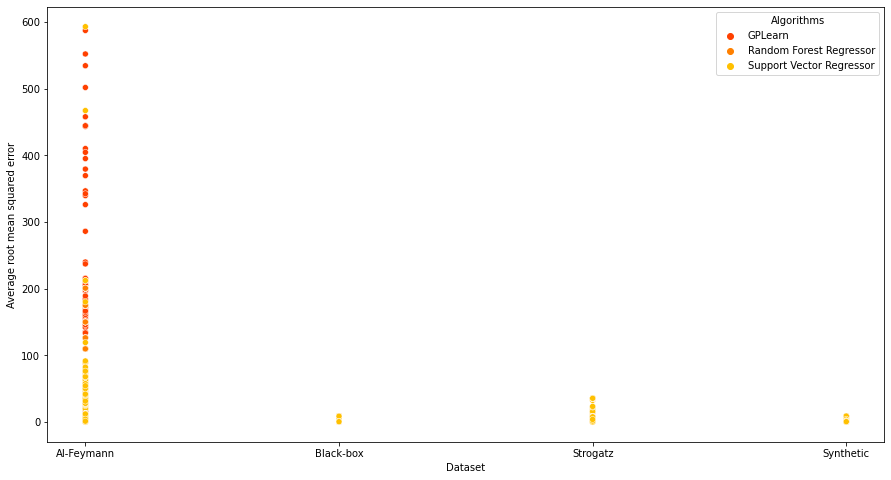

In [289]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Dataset", y = "Average root mean squared error", hue= "Algorithms", palette="autumn" , data = alldata)

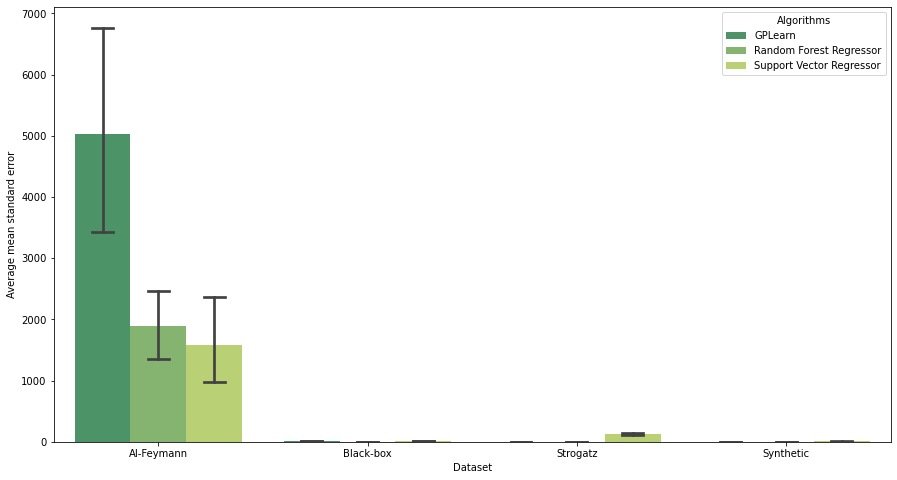

In [290]:
# alldata.rmse =  alldata[alldata["Age"] > 35]
# alldata =  alldata[alldata["Dataset"] != "Al-Feymann" ]
# alldata =  alldata[alldata["Dataset"] != "Strogatz" ]
alldata = alldata.rename(columns={"mse":"Average mean standard error"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean standard error", hue= "Algorithms", palette="summer" ,capsize=.1, data = alldata)



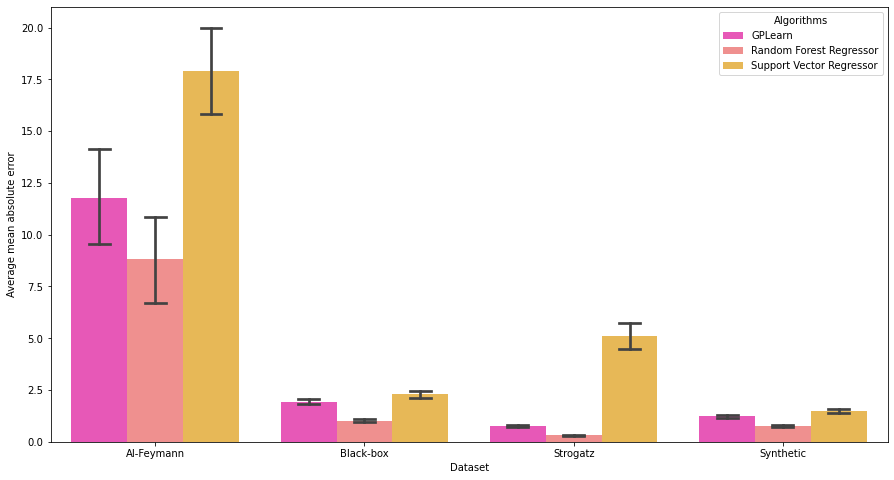

In [294]:
alldata = alldata.rename(columns={"mae":"Average mean absolute error"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean absolute error", hue= "Algorithms", palette="spring" ,capsize=.1, data = alldata)

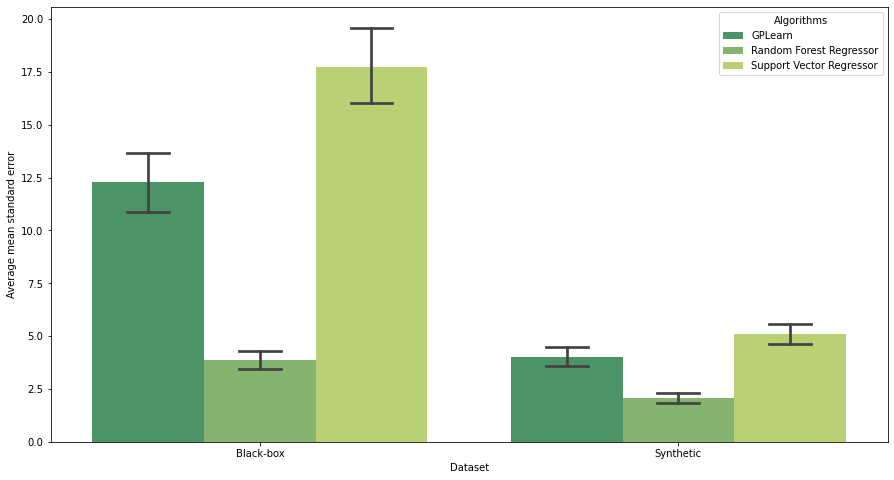

In [244]:
alldata = alldata[alldata["Dataset"]!="Strogatz"]

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean standard error", hue= "Algorithms", palette="summer" ,capsize=.1, data = alldata)

In [166]:
GPLearnBM["Algorithms"] = "GPLearn"
RRBM["Algorithms"] = "Random Forest Regressor"
SVBM["Algorithms"] = "Support Vector Regressor"


In [167]:
SymbolicRegressor()

,Cpu,mae,mse,rmse,File,population,generation,crossover,pc,Dataset,Algorithms
0,1.624534,2.498446,6.779226,2.603695,keijzer-8.training.csv,125,26,0.60,0.46,Synthetic,GPLearn
1,2.211039,3.385703,11.999977,3.464098,keijzer-8.training.csv,111,39,0.66,0.85,Synthetic,GPLearn
2,2.416983,3.594682,13.458732,3.668614,keijzer-8.training.csv,121,38,0.54,0.31,Synthetic,GPLearn
3,0.806743,3.361530,11.836879,3.440477,keijzer-8.training.csv,137,10,0.71,0.31,Synthetic,GPLearn
4,4.898158,3.594682,13.458732,3.668614,keijzer-8.training.csv,294,35,0.09,0.76,Synthetic,GPLearn
...,...,...,...,...,...,...,...,...,...,...,...
1041,1.257621,0.423667,0.277240,0.526535,nguyen-9.test.csv,260,13,0.01,0.61,Synthetic,GPLearn
1042,1.248792,0.819063,0.940960,0.970031,nguyen-10.test.csv,260,13,0.01,0.61,Synthetic,GPLearn
1043,46.442624,2.062264,6.985472,2.643004,keijzer-13.test.csv,260,13,0.01,0.61,Synthetic,GPLearn
1044,1.190042,0.457712,0.364866,0.604041,nguyen-4.test.csv,260,13,0.01,0.61,Synthetic,GPLearn


In [156]:
Support_Vector_Regression.head()

,Cpu,mae,mse,rmse,File,c,epison,cs,iterations,Algorithms,irace
0,0.011252,0.559539,1.288612,1.135170,strogatz_vdp1.csv,12.78,4.76,949.19,18,Support Vector Regression,irace
1,0.011291,0.615678,1.798052,1.340914,strogatz_vdp1.csv,6.78,5.74,160.85,10,Support Vector Regression,irace
2,0.011279,0.708047,3.138243,1.771509,strogatz_vdp1.csv,12.58,16.38,299.66,73,Support Vector Regression,irace
3,0.011146,0.708047,3.138243,1.771509,strogatz_vdp1.csv,5.66,11.56,692.71,72,Support Vector Regression,irace
4,0.010470,0.640264,2.349555,1.532826,strogatz_vdp1.csv,6.13,7.20,383.30,30,Support Vector Regression,irace


In [157]:
## Clean dataset
# for i in range(1246):
#     if Support_Vector_Regression.File[i].find("../Datasets/") != -1:
#         print(Support_Vector_Regression.File[i]) 
#         Support_Vector_Regression.File[i] = Support_Vector_Regression.File[i].replace("../Datasets/","")
# Support_Vector_Regression.to_csv("./SupportVectorRegression/time.csv", index=False)
result = GPLearn.append(Random_Forest.append(Support_Vector_Regression))
result = result.merge(all_stats, how='left', on='File')
result

,Cpu,mae,mse,rmse,File,population,generation,crossover,pc,Algorithms,...,num,depth,jobs,verbose,c,epison,cs,iterations,Number of observations,Number of features
0,0.957758,0.714875,2.991854,1.729698,strogatz_vdp1.csv,92.0,29.0,0.17,0.10,GPLearn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,2.0
1,1.638890,0.843674,3.075504,1.753711,strogatz_vdp1.csv,74.0,58.0,0.70,0.71,GPLearn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,2.0
2,1.778524,0.742919,2.882565,1.697812,strogatz_vdp1.csv,187.0,24.0,0.95,0.18,GPLearn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,2.0
3,0.683022,0.742919,2.882565,1.697812,strogatz_vdp1.csv,34.0,53.0,0.51,0.53,GPLearn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,2.0
4,5.327930,0.742919,2.882565,1.697812,strogatz_vdp1.csv,183.0,82.0,0.31,0.73,GPLearn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,0.009335,3.913469,15.692075,3.961322,strogatz_lv2.csv,NaN,NaN,NaN,NaN,Support Vector Regression,...,NaN,NaN,NaN,NaN,1.69,4.35,68.54,1.0,400.0,2.0
3491,0.009371,1.200932,3.250759,1.802986,strogatz_vdp1.csv,NaN,NaN,NaN,NaN,Support Vector Regression,...,NaN,NaN,NaN,NaN,1.69,4.35,68.54,1.0,400.0,2.0
3492,0.009366,5.904197,35.544915,5.961956,strogatz_lv1.csv,NaN,NaN,NaN,NaN,Support Vector Regression,...,NaN,NaN,NaN,NaN,1.69,4.35,68.54,1.0,400.0,2.0
3493,0.008342,0.086050,0.008913,0.094410,strogatz_vdp2.csv,NaN,NaN,NaN,NaN,Support Vector Regression,...,NaN,NaN,NaN,NaN,1.69,4.35,68.54,1.0,400.0,2.0


In [158]:
# models = {'GPLearn Symbolic Regression': ,
#           'Random Forest Regression': RR(),
#           'Support Vector Regression': SVR()
#          }
for i in range():
    
newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]

IndentationError: expected an indented block (<ipython-input-158-cc5cd09bf60c>, line 7)

# Static visualisations

In [12]:
RStime = pd.read_csv("./WithoutIrace/time.csv")
RStime

,Cpu,mae,mse,rmse,File,name,scores,Best Scores,Parameters
0,155.943911,0.279372,0.145419,0.381339,../Datasets/nguyen-9.training.csv,GP,0.612557,0.446055,"{'population_size': 291, 'parsimony_coefficien..."
1,173.227082,0.667949,1.374475,1.172380,../Datasets/vladislavleva-3.training.csv,GP,-0.000443,-0.001261,"{'population_size': 496, 'parsimony_coefficien..."
2,154.185816,0.350418,0.186200,0.431509,../Datasets/nguyen-6.training.csv,GP,0.710204,0.683805,"{'population_size': 162, 'parsimony_coefficien..."
3,125.946630,0.143415,0.054236,0.232886,../Datasets/keijzer-5.training.csv,GP,0.844316,0.853511,"{'population_size': 389, 'parsimony_coefficien..."
4,114.790612,1.204074,4.366404,2.089594,../Datasets/nguyen-4.training.csv,GP,0.148455,0.204882,"{'population_size': 168, 'parsimony_coefficien..."
...,...,...,...,...,...,...,...,...,...
85,0.142641,1.408130,2.043403,1.429476,../Datasets/keijzer-9.training.csv,SVM,-2.491264,-2.309403,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
86,0.141266,0.088602,0.010309,0.101534,../Datasets/keijzer-1.training.csv,SVM,0.153579,-6.137884,"{'rbf_svm__max_iter': 100, 'rbf_svm__epsilon':..."
87,0.141160,0.698213,0.569401,0.754587,../Datasets/nguyen-7.training.csv,SVM,-0.169180,-6.441609,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
88,0.142665,0.316836,0.117509,0.342795,../Datasets/keijzer-10.training.csv,SVM,-0.095972,-0.398235,"{'rbf_svm__max_iter': 89, 'rbf_svm__epsilon': ..."


In [93]:
# Get best configurations according to irace using synthetic dataset
df = pd.read_csv("./Datasets/keijzer-4.training.csv")
            
size = len(df.columns)-1
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1)

est_irace = SymbolicRegressor(population_size=336,generations=18, stopping_criteria=0.01, p_crossover=0.11, p_subtree_mutation=0,
                           p_hoist_mutation=0, p_point_mutation=0,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.89, random_state=126)
est_default = SymbolicRegressor(random_state=1)
est_random = SymbolicRegressor(population_size=309,generations=46, stopping_criteria=0.01, p_crossover=0.77, p_subtree_mutation=0,p_hoist_mutation=0, p_point_mutation=0,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.92, random_state=1)
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
y_test_pred = est_irace.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)
all_s = [mae,mse,rmse]

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    47.48           612482        7         0.189986         0.364595      5.11s
   1     7.42          1.03815        7         0.181624         0.439859      2.01s
   2     5.68         0.610593        7         0.188035         0.382158      1.83s
   3     3.00         0.266123        3         0.181578          0.44027      1.59s
   4     2.76         0.436998        3         0.179279         0.460961      1.54s
   5     1.14          0.36206        1         0.184607         0.439681      1.31s
   6     1.00         0.209473        1         0.190418         0.387383      1.29s
   7     1.00         0.210623        1         0.187636         0.412421      1.09s
   8     1.00         0.210436        1         0.189136         0.398926  

In [69]:
# Fit training sets into model
est_default.fit(X_train, y_train)
y_test_pred = est_default.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)
print(y_test_pred)

Error: 1.000000
0.19753762089153282
0.09264636598641343
0.3043786556025462
[-0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552]


In [95]:
# Fit training sets into model
est_random.fit(X_train, y_train)
y_test_pred = est_random.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    49.12           320084       15         0.193554         0.332485     12.37s
   1     7.05          4.55261       15          0.19781         0.294187      5.60s
   2     2.70         0.950945        3         0.189778         0.366474      4.96s
   3     1.00         0.262916        1         0.217109         0.497463      4.67s
   4     1.00         0.245361        1         0.224258         0.433117      4.52s
   5     1.00         0.245602        1         0.219544         0.475541      4.45s
   6     1.00         0.245312        1         0.225842         0.418859      4.41s
   7     1.00         0.245396        1         0.214837         0.517909      4.33s
   8     1.00         0.244663        1         0.219262         0.478084  

In [119]:
est_irace = RandomForestRegressor(n_estimators=150, max_depth=1,n_jobs= 11, verbose=4, random_state=984)
est_default = RandomForestRegressor()
est_random = RandomForestRegressor(n_estimators=497, max_depth=11,n_jobs= 3, verbose=12)
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
y_test_pred = est_irace.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150building tree 5 of 150building tree 6 of 150


building tree 7 of 150building tree 8 of 150
building tree 9 of 150

building tree 10 of 150building tree 11 of 150

building tree 12 of 150building tree 13 of 150building tree 14 of 150building tree 15 of 150



building tree 16 of 150
building tree 17 of 150building tree 18 of 150building tree 19 of 150

building tree 20 of 150

building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150building tree 25 of 150building tree 26 of 150building tree 27 of 150

building tree 28 of 150

building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150
building tree 34 of 150


building tree 35 of 150
building tree 36 of 150building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150

building tree 42 of 150
b

[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 150 out of 150 | elapsed:    0.0s finished


# Interactive visualisations

In [120]:
# Fit training sets into model
est_default.fit(X_train, y_train)
y_test_pred = est_default.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.015478062399602114
0.0006346703552021103
0.02519266471023084


In [121]:
# Fit training sets into model
est_random.fit(X_train, y_train)
y_test_pred = est_random.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 1 of 497
building tree 2 of 497building tree 3 of 497

building tree 4 of 497
building tree 5 of 497
building tree 6 of 497
building tree 7 of 497
building tree 8 of 497
building tree 9 of 497
building tree 10 of 497
building tree 11 of 497
building tree 12 of 497
building tree 13 of 497
building tree 14 of 497
building tree 15 of 497
building tree 16 of 497building tree 17 of 497

building tree 18 of 497
building tree 19 of 497
building tree 20 of 497
building tree 21 of 497
building tree 22 of 497
building tree 23 of 497building tree 24 of 497building tree 25 of 497


building tree 26 of 497
building tree 27 of 497
building tree 28 of 497
building tree 29 of 497building tree 30 of 497

building tree 31 of 497building tree 32 of 497
building tree 33 of 497

building tree 34 of 497
building tree 35 of 497
building tree 36 of 497
building tree 37 of 497
building tree 38 of 497building tree 39 of 497

building tree 40 of 497
building tree 41 of 497
building tree 42 of 497
b

[Parallel(n_jobs=3)]: Done 203 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 204 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 205 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 206 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 207 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 208 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 209 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 210 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 211 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 212 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 213 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 214 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 216 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 217 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 218 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Do

building tree 207 of 497building tree 208 of 497

building tree 209 of 497
building tree 210 of 497
building tree 211 of 497
building tree 212 of 497
building tree 213 of 497building tree 214 of 497

building tree 215 of 497building tree 216 of 497

building tree 217 of 497
building tree 218 of 497
building tree 219 of 497
building tree 220 of 497
building tree 221 of 497
building tree 222 of 497
building tree 223 of 497
building tree 224 of 497
building tree 225 of 497
building tree 226 of 497
building tree 227 of 497
building tree 228 of 497
building tree 229 of 497
building tree 230 of 497building tree 231 of 497

building tree 232 of 497
building tree 233 of 497
building tree 234 of 497
building tree 235 of 497
building tree 236 of 497
building tree 237 of 497
building tree 238 of 497
building tree 239 of 497
building tree 240 of 497
building tree 241 of 497
building tree 242 of 497
building tree 243 of 497
building tree 244 of 497
building tree 245 of 497
building tree 246 of 497


[Parallel(n_jobs=3)]: Done 395 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 396 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 397 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 398 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 399 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 400 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 401 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 402 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 403 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 404 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 405 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 406 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 407 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 408 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 409 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 410 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Do

In [122]:
acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.015514369932092159
0.0006565214318534127
0.02562267417451607


In [123]:
est_irace = make_pipeline(StandardScaler(),SVR(C=6247.89, epsilon=6.36, tol = 1.0, max_iter = 239))
est_default = make_pipeline(StandardScaler(),SVR())
est_random = make_pipeline(StandardScaler(),SVR(C=9, epsilon=0.7, tol = 0.7867303370786517, max_iter = 35))
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
y_test_pred = est_irace.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.19311334611473205
0.08884315194102471
0.29806568393732397


In [103]:
# Fit training sets into model
est_default.fit(X_train, y_train)
y_test_pred = est_default.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.18663847875389095
0.06695343921841454
0.2587536264836003


In [102]:
est_random.fit(X_train, y_train)
y_test_pred = est_random.predict(X_test)
acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.19311334611473205
0.08884315194102471
0.29806568393732397


In [273]:
data = [[0.1930874829691703, 0.08880979847863722,0.298009728832193,"GPLearn","irace"],[0.19753762089153282, 0.09264636598641343,0.3043786556025462,"GPLearn","Default"] ,[0.2051935833201989, 0.08737289134686937,0.29558905823265746,"GPLearn","RandomCV"], [0.21828186311083406, 0.07271949513102019,0.26966552455035886,"Random Forest","irace"],[0.015858728156966217,0.0007109748885120509,0.026664112370601255,"Random Forest","Default"] ,[0.015482163190644344, 0.0006722238431702767,0.025927279903034114,"Random Forest","RandomCV"], [0.19311334611473205, 0.08884315194102471,0.29806568393732397,"SVR","irace"],[0.18663847875389095, 0.06695343921841454,0.2587536264836003,"SVR","Default"] ,[0.19311334611473205, 0.08884315194102471,0.29806568393732397,"SVR","RandomCV"]]
# Create the pandas DataFrame
all_s = pd.DataFrame(data, columns = ['Mean absolute error', 'Mean squared error','rmse','Algorithm','Status'])
all_s = all_s.rename(columns={"rmse":"Root mean squared error"})

In [274]:
all_s

,Mean absolute error,Mean squared error,Root mean squared error,Algorithm,Status
0,0.193087,0.088810,0.298010,GPLearn,irace
1,0.197538,0.092646,0.304379,GPLearn,Default
2,0.205194,0.087373,0.295589,GPLearn,RandomCV
3,0.218282,0.072719,0.269666,Random Forest,irace
4,0.015859,0.000711,0.026664,Random Forest,Default
5,0.015482,0.000672,0.025927,Random Forest,RandomCV
6,0.193113,0.088843,0.298066,SVR,irace
7,0.186638,0.066953,0.258754,SVR,Default
8,0.193113,0.088843,0.298066,SVR,RandomCV


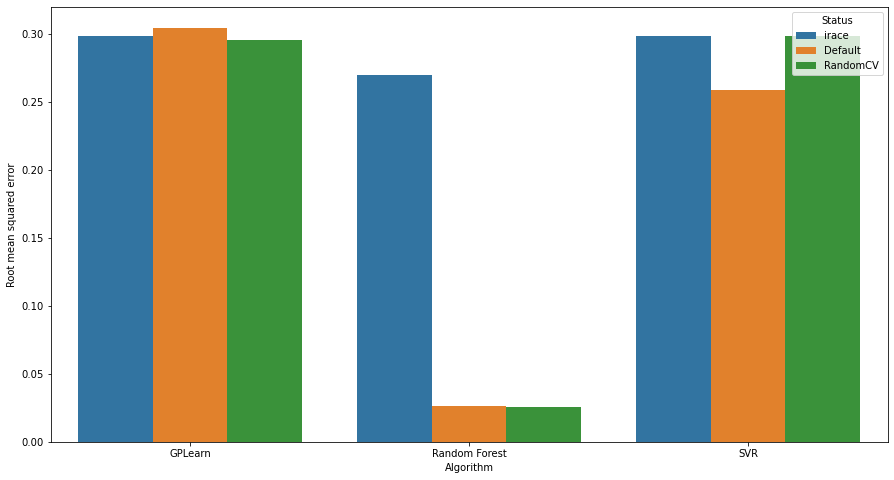

In [275]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x= "Algorithm", y="Root mean squared error", hue="Status", data=all_s )

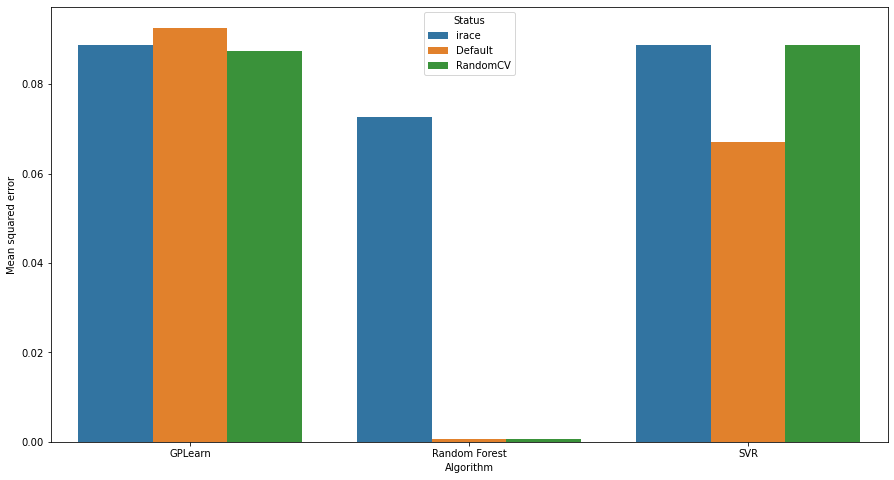

In [280]:
plt.figure(figsize=(15,8))
g = sns.barplot(x= "Algorithm", y='Mean squared error', hue="Status", data=all_s )

# for index, row in all_s.iterrows():
#     g.text(row.name,row['Mean squared error'], round(row['Mean squared error'],2), color='black', ha="center")



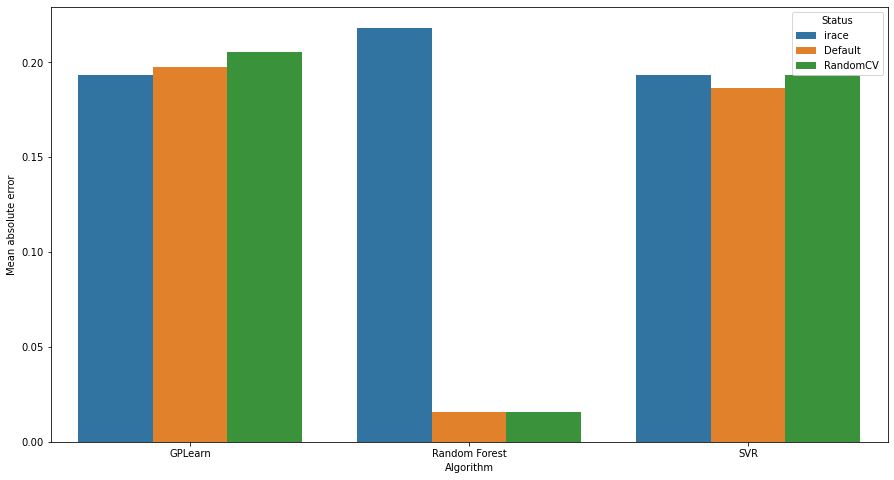

In [279]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x= "Algorithm", y="Mean absolute error", hue="Status", data=all_s )

In [139]:
sum(all_GP["Cpu"])

34736.303535000014

In [138]:
sum(all_RR["Cpu"])

20084.718331999986

In [137]:
sum(all_SVR["Cpu"])

356.6395269999999

In [179]:
dftime = pd.read_csv("./WithoutIrace/time.csv")
dftimeGP = dftime[dftime.name=="GP"]
dftimeRR = dftime[dftime.name=="RR"]
dftimeSVR = dftime[dftime.name=="SVM"]
dftime

,Cpu,mae,mse,rmse,File,name,scores,Best Scores,Parameters
0,155.943911,0.279372,0.145419,0.381339,../Datasets/nguyen-9.training.csv,GP,0.612557,0.446055,"{'population_size': 291, 'parsimony_coefficien..."
1,173.227082,0.667949,1.374475,1.172380,../Datasets/vladislavleva-3.training.csv,GP,-0.000443,-0.001261,"{'population_size': 496, 'parsimony_coefficien..."
2,154.185816,0.350418,0.186200,0.431509,../Datasets/nguyen-6.training.csv,GP,0.710204,0.683805,"{'population_size': 162, 'parsimony_coefficien..."
3,125.946630,0.143415,0.054236,0.232886,../Datasets/keijzer-5.training.csv,GP,0.844316,0.853511,"{'population_size': 389, 'parsimony_coefficien..."
4,114.790612,1.204074,4.366404,2.089594,../Datasets/nguyen-4.training.csv,GP,0.148455,0.204882,"{'population_size': 168, 'parsimony_coefficien..."
...,...,...,...,...,...,...,...,...,...
85,0.142641,1.408130,2.043403,1.429476,../Datasets/keijzer-9.training.csv,SVM,-2.491264,-2.309403,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
86,0.141266,0.088602,0.010309,0.101534,../Datasets/keijzer-1.training.csv,SVM,0.153579,-6.137884,"{'rbf_svm__max_iter': 100, 'rbf_svm__epsilon':..."
87,0.141160,0.698213,0.569401,0.754587,../Datasets/nguyen-7.training.csv,SVM,-0.169180,-6.441609,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
88,0.142665,0.316836,0.117509,0.342795,../Datasets/keijzer-10.training.csv,SVM,-0.095972,-0.398235,"{'rbf_svm__max_iter': 89, 'rbf_svm__epsilon': ..."


In [197]:
timedf = [[34736.303535000014/60,"GPLearn","irace"],[20084.718331999986/60,"Random Forest Regression","irace"],[356.6395269999999/60,"Support Vector Regression","irace"],[sum(dftimeGP["Cpu"])/60,"GPLearn","RandomCV"],[sum(dftimeRR["Cpu"])/60,"Random Forest Regression","RandomCV"],[sum(dftimeSVR["Cpu"])/60,"Support Vector Regression","RandomCV"]]
# Create the pandas DataFrame
all_rr = pd.DataFrame(timedf, columns = ['Total CPU computational time [mins]','Algorithm','Status'])

all_rr

,Total CPU computational time [mins],Algorithm,Status
0,578.938392,GPLearn,irace
1,334.745306,Random Forest Regression,irace
2,5.943992,Support Vector Regression,irace
3,78.146726,GPLearn,RandomCV
4,4.179208,Random Forest Regression,RandomCV
5,0.073146,Support Vector Regression,RandomCV


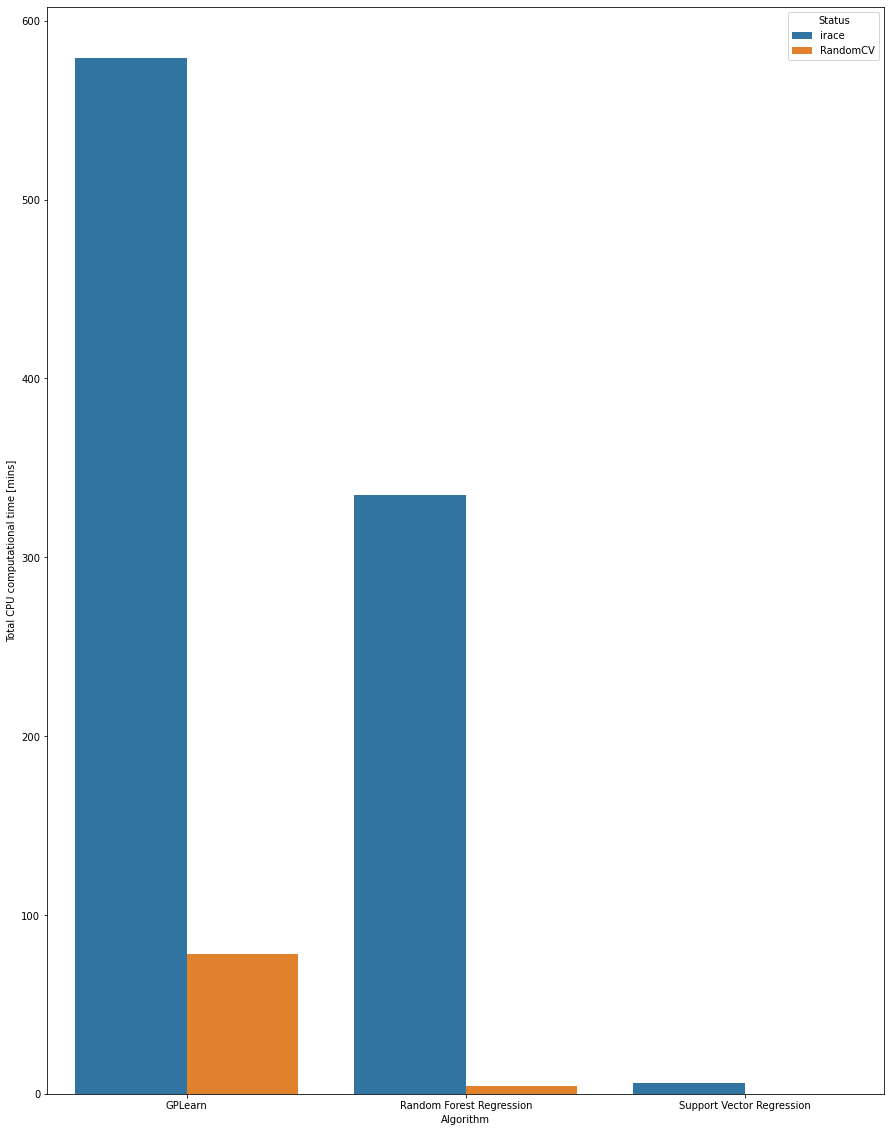

In [211]:
plt.figure(figsize=(15,20))
ax = sns.barplot(x= "Algorithm", y='Total CPU computational time [mins]', hue="Status", data=all_rr )

In [203]:
dfttimeGP = all_rr[all_rr.Algorithm=="GPLearn"]
dfttimeRR = all_rr[all_rr.Algorithm=="Random Forest Regression"]
dfttimeSVR = all_rr[all_rr.Algorithm=="Support Vector Regression"]

<AxesSubplot:xlabel='Algorithm', ylabel='Total CPU computational time [mins]'>

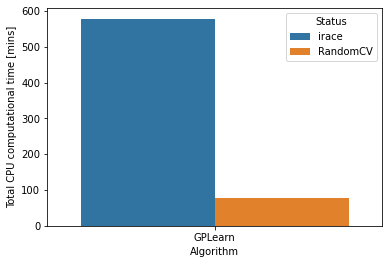

In [200]:
sns.barplot(x= "Algorithm", y='Total CPU computational time [mins]', hue="Status", data=dfttimeGP )

<AxesSubplot:xlabel='Algorithm', ylabel='Total CPU computational time [mins]'>

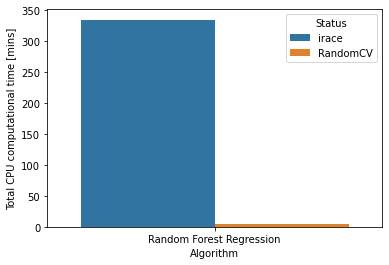

In [295]:
sns.barplot(x= "Algorithm", y='Total CPU computational time [mins]', hue="Status", data=dfttimeRR )

<AxesSubplot:xlabel='Algorithm', ylabel='Total CPU computational time [mins]'>

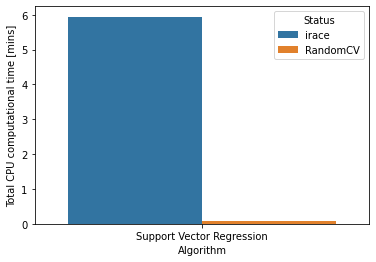

In [205]:
sns.barplot(x= "Algorithm", y='Total CPU computational time [mins]', hue="Status", data=dfttimeSVR )